Import all the required modules

In [91]:
#Deep Learning Modules
import tensorflow as tf
from tensorflow import keras

#General Mathematics Modules
import numpy as np
import matplotlib.pyplot as plt

Import the colour data from working directory.
Oh bollocks they're all different sizes!
I'll start using Keras' inbult colour data and then move on to using my own Kaggle download.
__This took just under 7 minutes and God knows how much hard drive space! Do _not_ run it again!__

In [92]:
##I can look into keras.datasets inbuilt datasets later!
colour_data = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = colour_data.load_data() #this takes an age to load

We explore the dimensions of the training set: it contains 50,000, 32x32 images that we shall look at later.

We also explore the dimensions of the test set: it contains 10,000 32x32 images we shall use to check the 'correctness' of the ANN.

The labels are numbers (0-9) which correspond to the following objects: 0 = airplane, 1 = automobile, 2 = bird, 3 = cat, 4 = deer, 5 = dog, 6 = frog, 7 = horse, 8 = ship, 9 = truck.

In [93]:
print(train_images.shape)
print(len(train_labels))

print("")

print(test_images.shape)
print(len(test_labels))

(50000, 32, 32, 3)
50000

(10000, 32, 32, 3)
10000


We observe that each of the 32 entries in the test_images dataset is a 3x32 matrix corresponding to the RGB pixel value of each pixel in each image.

In [94]:
test_images[5] #I bet this is an array of arrays of RGB values of the pixels making up the images. I also think each array is
#across a row. So (1,1,1) = (179, 118, 83), ..., (1,1,32) =  (77, 47, 41)

array([[[179, 118,  83],
        [139,  96,  61],
        [ 77,  49,  26],
        ...,
        [ 87,  53,  46],
        [ 76,  47,  41],
        [ 77,  47,  41]],

       [[184, 130,  97],
        [133,  88,  53],
        [128,  89,  58],
        ...,
        [ 98,  61,  53],
        [ 91,  58,  51],
        [ 90,  57,  49]],

       [[180, 132, 100],
        [152, 104,  71],
        [176, 129,  92],
        ...,
        [101,  62,  53],
        [ 93,  56,  47],
        [ 95,  57,  49]],

       ...,

       [[142,  73,  61],
        [149,  84,  75],
        [144,  81,  73],
        ...,
        [119,  68,  56],
        [139,  87,  78],
        [159, 100,  89]],

       [[152,  83,  70],
        [166,  96,  81],
        [179, 106,  90],
        ...,
        [131,  77,  65],
        [144,  87,  77],
        [153,  90,  79]],

       [[159,  92,  79],
        [178, 107,  93],
        [183, 113,  95],
        ...,
        [150,  90,  76],
        [153,  91,  79],
        [152,  87,  73]]

Let's begin looking at some of the images in the training dataset. We define a list of class names with their indices corresponding to that defined above, then we define a function which displays an image and it's correct label.

In [95]:
#Initialise class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_training_image(i):
    plt.figure()
    
    plt.imshow(train_images[i]) #display image and label
    plt.xlabel("Type: " + class_names[train_labels[i][0]])
    
    plt.xticks([]) #remove axes
    plt.yticks([])
    
    plt.grid(False) #disable gridlines
    
    plt.show()
    
    return None

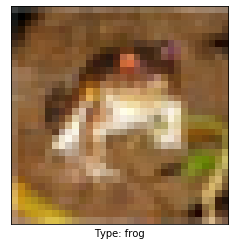

In [96]:
show_training_image(0)

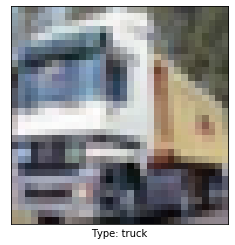

In [97]:
show_training_image(1)

Now, because the tutorial I followed insists it, we scale down the RGB pixel values. (But why?)

In [98]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Now we have confirmed for the first few images that the training set is correctly labelled. We are in a position to begin building our neural network.

I'm copy-pasting code from a tutorial I don't understand at the moment simply because I lack the knowledge about ANNs.

In [100]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) #This throws some 'phasing-out' exception.

In [101]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The above code establishes the model. We now fit the training data to it.

In [103]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 11s 216us/sample - loss: 1.5845 - acc: 0.4385
Epoch 2/10
50000/50000 [==============================] - 10s 197us/sample - loss: 1.5786 - acc: 0.4420
Epoch 3/10
50000/50000 [==============================] - 10s 203us/sample - loss: 1.5696 - acc: 0.4435
Epoch 4/10
50000/50000 [==============================] - 9s 174us/sample - loss: 1.5623 - acc: 0.4438
Epoch 5/10
50000/50000 [==============================] - 10s 193us/sample - loss: 1.5546 - acc: 0.4475
Epoch 6/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.5479 - acc: 0.4491
Epoch 7/10
50000/50000 [==============================] - 10s 198us/sample - loss: 1.5436 - acc: 0.4505
Epoch 8/10
50000/50000 [==============================] - 9s 189us/sample - loss: 1.5351 - acc: 0.4539
Epoch 9/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.5297 - acc: 0.4566
Epoch 10/10
50000/50000 [==============================] - 10s 194us

Regardless of whether I use 10 or 20 epochs, this achieves a -rather crap- accuracy of 45% on the test data. Minor overfitting has occured.

__How could I possibly improve on this accuracy?__

In [104]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.5801 - acc: 0.4387

Test accuracy: 0.4387


We should now be able to make predicitions on the the test data:

In [105]:
predictions = model.predict(test_images)

We define a function to compare the test data labels to their images.

In [110]:
def check_prediction(i):
    plt.figure()
    plt.imshow(test_images[i])
    plt.xlabel("True: " + class_names[test_labels[i][0]] + "\n Predicted: "
               + class_names[np.argmax(predictions[i])] + "\n Accurate: "
               + str(class_names[np.argmax(predictions[i])] == class_names[test_labels[i][0]])) #This isn't working!
    plt.grid(False)
    plt.show()
    return None

Please keep in mind the ones it gets right and wrong changes for each- or does it?!? That wouldn't make sense!

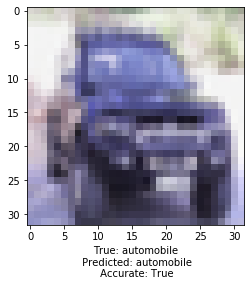

In [111]:
check_prediction (9) #An example of one it gets right!

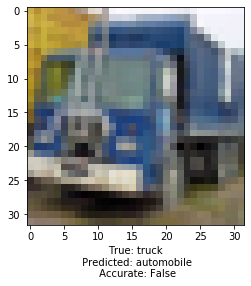

In [112]:
check_prediction(14) #An example of one it gets spectacuarly wrong!

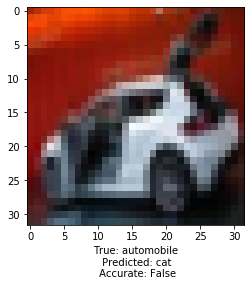

In [113]:
check_prediction(6) #You know, strangely enough, I can see why it might think this one! The colours and the 'tail' indicate cat.